In [1]:
import numpy as np
from keras.models import Sequential, model_from_json
from keras.layers import Dense, Activation, Dropout
from keras import optimizers
from keras import callbacks

# 資料整理
data_restore = np.load('BikeSharingData/day.npy')
tr = data_restore [0:-100 ,:]
ts = data_restore [-100:,:]
mean = np.mean(tr , axis=0)
stdv = np.std(tr , axis=0)
tr = (tr - mean) / stdv
ts = (ts - mean) / stdv
x_train , y_train = tr[:, 0:11], tr[:, -1:]
x_test , y_test = ts[:,0:11 ,], ts[:, -1:]

# 模型設計
model = Sequential ([
Dense(16 , activation ='sigmoid', input_shape =(11 ,)),
Dropout(0.2),
Dense(16 , activation ='sigmoid'),
Dropout(0.2),
Dense(1),])

# 指定減損函數，參數訓練方法
model.compile( optimizer='Adam' , loss='mean_squared_error')
# 保存架構
with open('my_network.json', 'w') as fout:
    fout.write(model.to_json())
# 保存參數
saver = callbacks.ModelCheckpoint('Model/keras_bike.epoch_{epoch:02d}.hdf5')
model.fit(x_train , y_train , epochs =50 , batch_size =4, callbacks=[saver])

Using TensorFlow backend.


Epoch 1/50
631/631 [==============================] - 0s - loss: 1.1218     
Epoch 2/50
631/631 [==============================] - 0s - loss: 0.8344     
Epoch 3/50
631/631 [==============================] - 0s - loss: 0.6388     
Epoch 4/50
631/631 [==============================] - 0s - loss: 0.5033     
Epoch 5/50
631/631 [==============================] - 0s - loss: 0.4354     
Epoch 6/50
631/631 [==============================] - 0s - loss: 0.3653     
Epoch 7/50
631/631 [==============================] - 0s - loss: 0.3563     
Epoch 8/50
631/631 [==============================] - 0s - loss: 0.3314     
Epoch 9/50
631/631 [==============================] - 0s - loss: 0.3030     
Epoch 10/50
631/631 [==============================] - 0s - loss: 0.3321     
Epoch 11/50
631/631 [==============================] - 0s - loss: 0.2921     
Epoch 12/50
631/631 [==============================] - 0s - loss: 0.2562     
Epoch 13/50
631/631 [==============================] - 0s - loss: 0.2769 

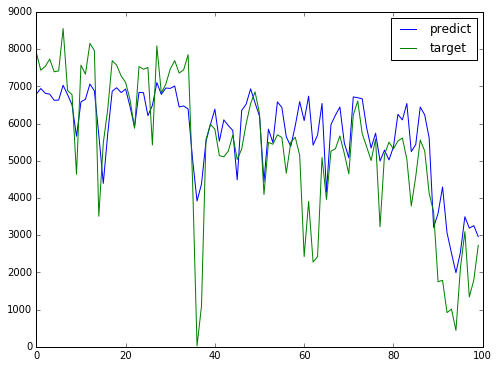

In [2]:
# 輸入測試資料
y_pred = model.predict(x_test)
cnt_pred = y_pred * stdv[-1] + mean[-1]
cnt_true = y_test * stdv[-1] + mean[-1]

# 繪圖
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [8,6]
day = range(100)
plt.plot(day , cnt_pred , label='predict')
plt.hold(True)
plt.plot(day , cnt_true , label='target')
plt.legend()
plt.show()